# Lula's speeches to Congress

On January 1st, 2023, Lula was sworn in as the new president of Brazil for the third time, the first and only one to do so considering only democratic elections. In the swearing-in ceremony, he spoke to congress, just like in 2003 and 2007. 

Let's check the similarities and differences.

--- 

# EDA

In [1]:
# Importing libraries

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re
import seaborn as sns

from utils.plotting import plot_wordcloud
from utils.regex import drop_regex_patterns, replace_new_line
from utils.token import tokenize_frequency

In [2]:
# Setting plot parameters

mpl.rcParams["font.size"] = 12

In [3]:
# Opening the speeches

with open("data\lula_congress_speech_2023.txt", "r",encoding="utf8") as f:
    congress_speech_23 = f.read()
    
with open("data\lula_congress_speech_2003.txt", "r",encoding="utf8") as f:
    congress_speech_03 = f.read()
    
with open("data\lula_congress_speech_2007.txt", "r",encoding="utf8") as f:
    congress_speech_07 = f.read()

Before starting the analysis, it is necessary to get rid of punctuations, non-alphanumeric characters, and linebreaks. We will do this using regular expressions (regex).

In [4]:
# Useful regex to clean the data

# Search for the complementary non-alphanumeric character and white space
regex_punct_space = re.compile(r"[^\w\s]")
# Search for line breaks
regex_linebreak = re.compile(r"(\n)")

In [5]:
# Store the txt files in a data frame

columns = ["year", "speech"]
speech_title = ["2003", "2007", "2023"]
speech= [congress_speech_03, congress_speech_07,congress_speech_23]

df_speech = pd.DataFrame(list(zip(speech_title, speech)), columns=columns)

In [6]:
# Cleaning the data

df_speech["clean_speech"] = df_speech["speech"]
df_speech["clean_speech"] = drop_regex_patterns(df_speech["clean_speech"], regex_punct_space) 
df_speech["clean_speech"] = replace_new_line(df_speech["clean_speech"], regex_linebreak) 

--- 

# Speeches length

The punctuations were removed, and it is possible to count the number of words in Lula's three Congress speeches.

In [7]:
# Displaying the file length and storing it in a column

df_speech["length"] = 0
for row in range(df_speech.shape[0]):
    df_speech["length"][row] = len(df_speech["clean_speech"][row])
    print("Length of " +str(df_speech["year"][row]) + " Lula's congress' speech: ", len(df_speech["clean_speech"][row]))

Length of 2003 Lula's congress' speech:  23857
Length of 2007 Lula's congress' speech:  23187
Length of 2023 Lula's congress' speech:  18433


C:\Users\steph\AppData\Local\Temp\ipykernel_3044\4203751408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speech["length"][row] = len(df_speech["clean_speech"][row])


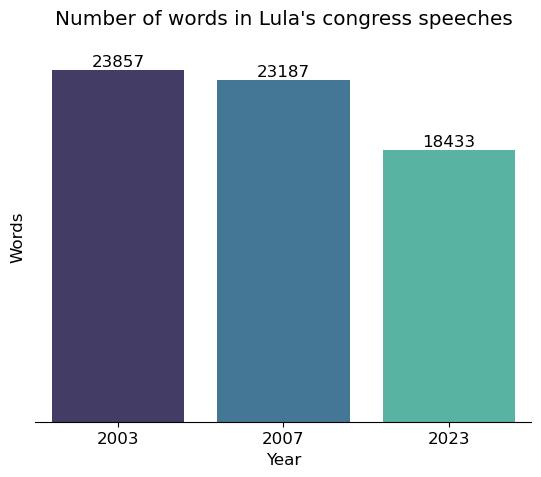

In [8]:
# Plotting Lula's speech length over time

ax = sns.barplot(x="year", y="length", data=df_speech, palette = "mako")

for i in ax.containers:
    ax.bar_label(i,)

# Pad parameter set the distance between the title and the top frame    
ax.set_title("Number of words in Lula's congress speeches", pad=20)
plt.xlabel("Year")
plt.ylabel("Words")
plt.yticks([]) # Hidding the y-axis ticks
ax.spines['top'].set_visible(False) # Hidding the graph's top frame
ax.spines['right'].set_visible(False) # Hidding the graph's right frame
ax.spines['left'].set_visible(False) # Hidding the graph's left frame
plt.show()

Over time, Lula's speeches have been shortened from almost 24000 words in 2003 to slightly over 18000 in 2023. 

---

# Most common words

The next step is to count the most common words in Lula's speeches. the first step is to remove the stop words, which are the ones that carry no meaning. Most of them are prepositions, pronouns, and articles. 

Let's get rid of them.

In [9]:
# Counting the most common words in congress' speeches

word_frequency_list = []
for row in range(df_speech.shape[0]):
    tokens_frequency_congress = nltk.tokenize.word_tokenize(df_speech["clean_speech"][row])
    word_frequency_congress = nltk.FreqDist(tokens_frequency_congress)
    word_frequency_list.append(word_frequency_congress)

Also, let's remove the stop words, which are the ones that carry no meaning. Most of them are prepositions, pronouns, and articles. Let's get rid of them.

In [10]:
# Creating a list with PT_BR stop words

pt_stop_words = nltk.corpus.stopwords.words("portuguese")

In [11]:
# Removing the stop words 

df_speech["clean_speech"] = df_speech["clean_speech"].apply(lambda x: ' '\
                                    .join([word for word in x.split() if word not in (pt_stop_words)]))

In [12]:
# Tokenizing the texts and counting the tokens frequency

tokenized_word_frequency_03 = tokenize_frequency(df_speech, "clean_speech", 0)
tokenized_word_frequency_07 = tokenize_frequency(df_speech, "clean_speech", 1)
tokenized_word_frequency_23 = tokenize_frequency(df_speech, "clean_speech", 2)

Now, let's plot the 10 most common words for the 3 speeches.

In [13]:
# Selecting the 10 most common words

common_words_03 = pd.Series(dict(tokenized_word_frequency_03.most_common(10)))
common_words_07 = pd.Series(dict(tokenized_word_frequency_07.most_common(10)))
common_words_23 = pd.Series(dict(tokenized_word_frequency_23.most_common(10)))

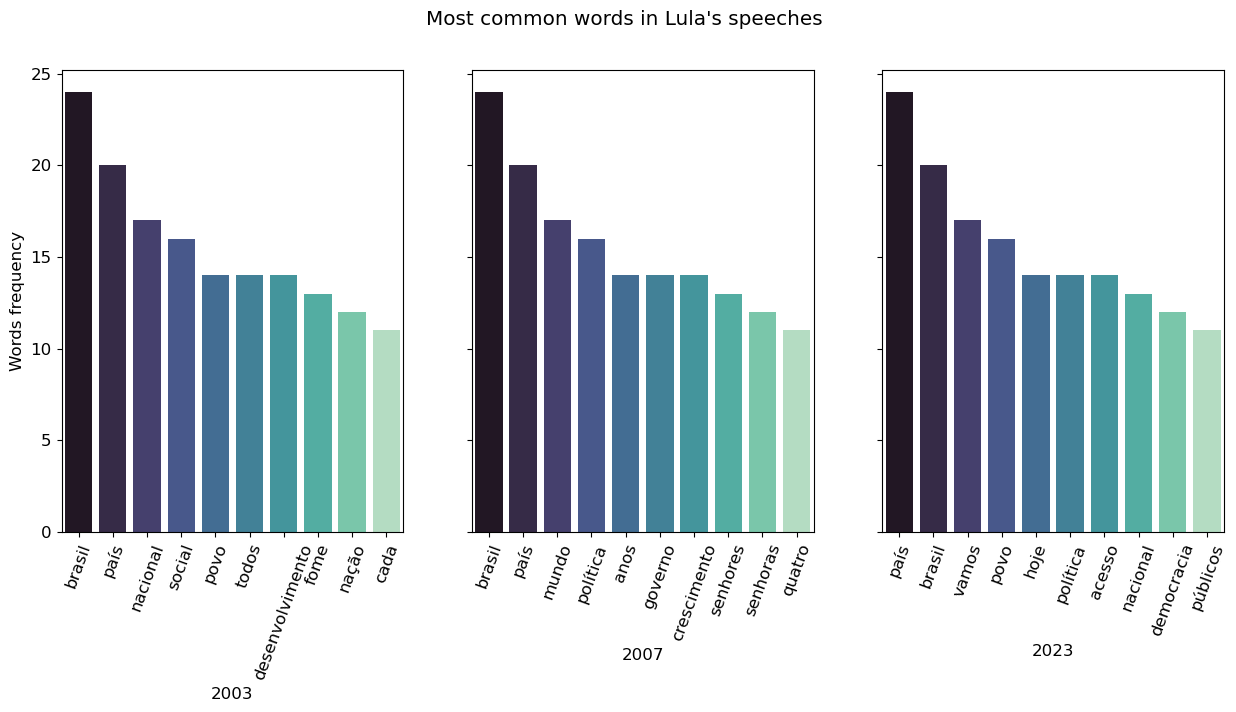

In [14]:
# Plotting the most common words in Lula's speeches

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,6))

sns.barplot(x=common_words_03.index, y=common_words_03.values, palette="mako", ax=ax1)
ax1.set_xlabel("2003")
ax1.set_ylabel("Words frequency")
ax1.set_xticklabels(common_words_03.index, rotation=70)

sns.barplot(x=common_words_07.index, y=common_words_03.values, palette="mako", ax=ax2)
ax2.set_xlabel("2007")
ax2.set_xticklabels(common_words_07.index, rotation=70)

sns.barplot(x=common_words_23.index, y=common_words_03.values, palette="mako", ax=ax3)
ax3.set_xlabel("2023")
ax3.set_xticklabels(common_words_23.index, rotation=70)

fig.suptitle("Most common words in Lula's speeches")
plt.show()

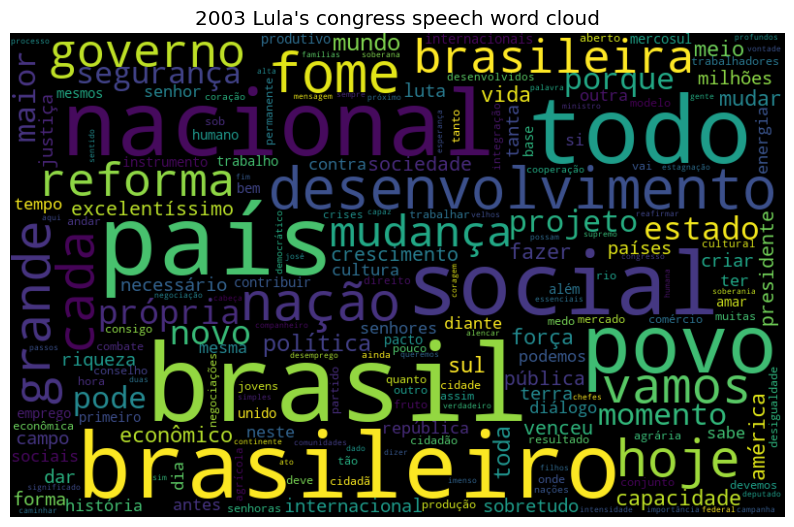

In [15]:
# PLotting the cloud word for the Lula's first speech in 2003

title = "2003 Lula's congress speech word cloud"
plot_wordcloud(df_speech["clean_speech"][0], title)

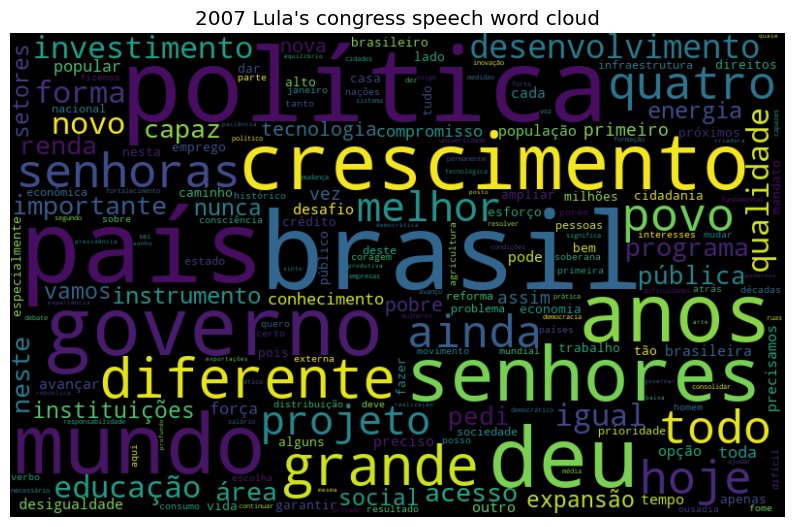

In [16]:
# PLotting the cloud word for the Lula's second speech in 2007

title = "2007 Lula's congress speech word cloud"
plot_wordcloud(df_speech["clean_speech"][1], title)

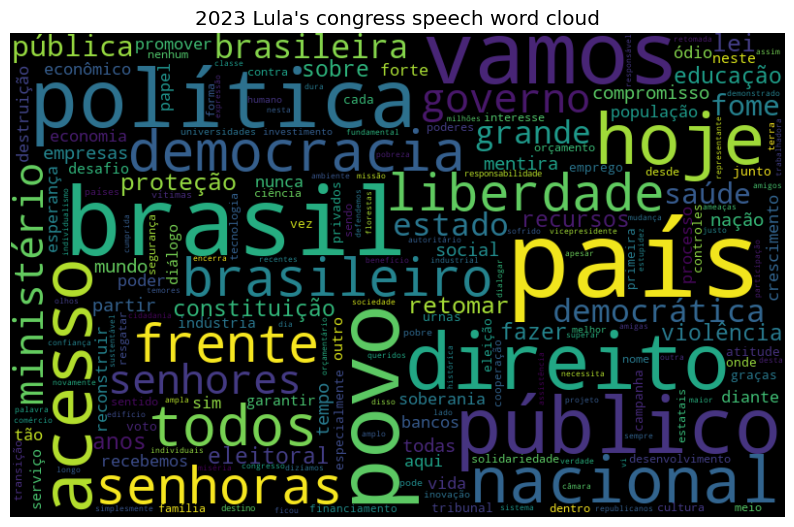

In [17]:
# PLotting the cloud word for the Lula's third speech in 2023

title = "2023 Lula's congress speech word cloud"
plot_wordcloud(df_speech["clean_speech"][2], title)

Analyzing the word clouds and the bar plots, we draw some conclusions:

- in all the congress speeches, the words país and Brasil (country and Brazil respectively) are the two most common terms;
- in the first and the third speeches, the words social, povo, and todos (social, people, and all/every) shows that the government would prioritize reconstruction, unity, and social welfare.
- in his second speech, the words like política, quatro, anos, and governo (politics, four, years, and government) indicate that Lula focused on what he and his government achieved in the last four years.

--- 